# Edwin Villafane Hernandez
## Final Project: Covid 19 Bing Search Query Exploration
Github link: https://github.com/edwinvillafane/cisb63-final

This project is using Microsoft Bing search queries related to Covid19. This dataset was curated from the Bing search logs (desktop users only) over the period of Jan 1st, 2020 – (Current Month - 1). Dataset includes queries from all over the world that had an intent related to the Coronavirus or Covid-19. In some cases this intent is explicit in the query itself, e.g. “Coronavirus updates Seattle” in other cases it is implicit , e.g. “Shelter in place”. The data for this project is available to download on Kaggle at: https://www.kaggle.com/datasets/saurabhshahane/microsoft-bing-search-for-corona-virus-intent/

My overall goal for this project is to apply some advanced NLP techniques such as text summarization and word embedding cluster visualizations to better understand different ways that people were using Bing to learn about COVID 19 developments. 


This project uses the following Python libraries and NLP techniques
- Numpy, Pandas, Matplotlib and seaborn
- NLTK, Word2Vec, Scikit-learn, LDA, Transformers, Wordcloud, spacy

Section 1: Exploratory Data Analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize 
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import warnings 
warnings.filterwarnings('ignore')

In [9]:
# only focus on Queries by Country for month of June
df = pd.read_csv('./data/QueriesByCountry_2020-06-01_2020-06-30.tsv', sep='\t')
df.head()

,Date,Query,IsImplicitIntent,Country,PopularityScore
0,2020-06-01,covid antibody test near me,False,United States,1
1,2020-06-01,ouverture frontière belge,True,France,1
2,2020-06-01,connect myflorida login,True,United States,17
3,2020-06-01,covid antibody test,False,United States,1
4,2020-06-01,covid antibody,False,United States,1


Handling Missing or Null Values
Data Transformation use: Describe, head, info, etc

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392193 entries, 0 to 392192
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              392193 non-null  object
 1   Query             392193 non-null  object
 2   IsImplicitIntent  392193 non-null  bool  
 3   Country           392193 non-null  object
 4   PopularityScore   392193 non-null  int64 
dtypes: bool(1), int64(1), object(3)
memory usage: 12.3+ MB


In [12]:
df.describe()

,PopularityScore
count,392193.000000
mean,2.840874
std,10.053766
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,100.000000


Given that this slice of data is happening relatively early on in the pandemic, it makes sense why many of the search queries have low PopularityScores as interest in these queries may not be really popular compared to March 2020 or later on when vaccines started rolling out.

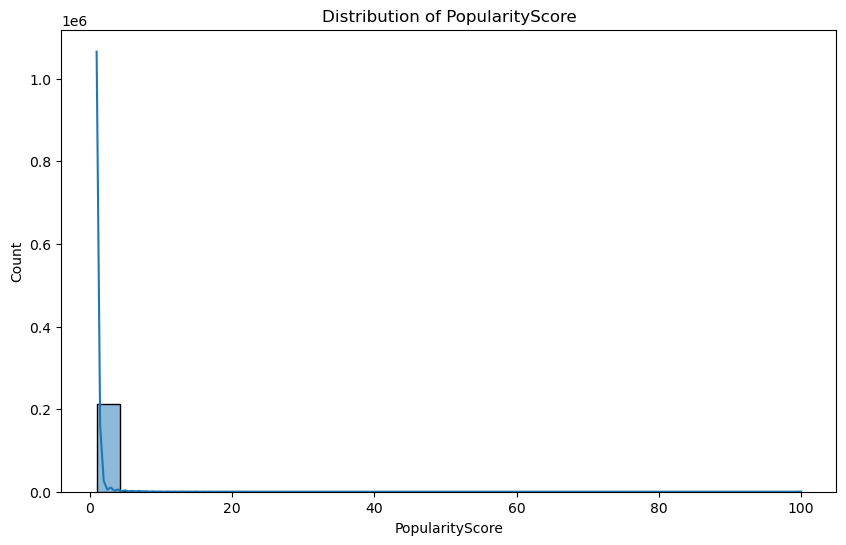

In [112]:
# Visualize the distribution of 'PopularityScore'
plt.figure(figsize=(10, 6))
sns.histplot(df['PopularityScore'], bins=30, kde=True)
plt.title('Distribution of PopularityScore')
plt.show()

Popularity score over the course of a month doesn't seem to show us anything particularly insightful, perhaps it would be more interesting to look at a sample of search queries over the 2 years.

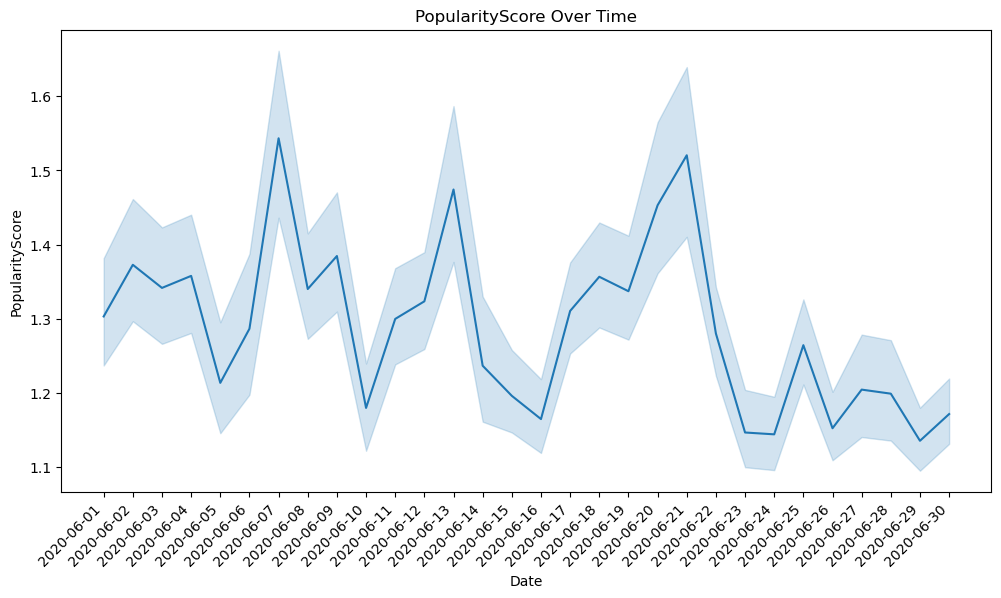

In [116]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='PopularityScore', data=df)
plt.title('PopularityScore Over Time')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
df['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Canada', 'India',
       'Australia', 'China', 'Panama', 'Germany', 'Puerto Rico', 'Italy',
       'Korea (South)', 'Czech Republic', 'Argentina', 'South Africa',
       'Brazil', 'Nigeria', 'Mexico', "Cote D'ivoire", 'Guatemala',
       'Sweden', 'Zimbabwe', 'Taiwan', 'Serbia', 'Tunisia', 'Japan',
       'Austria', 'New Zealand', 'Hong Kong', 'Belgium', 'Qatar', 'Ghana',
       'Turkey', 'Saudi Arabia', 'Reunion', 'Mayotte', 'Aland Islands',
       'Trinidad And Tobago', 'Guyana', 'Isle Of Man', 'Colombia',
       'Cayman Islands', 'Georgia', 'Russian Federation', 'Lesotho',
       'Ukraine', 'Pakistan', 'Romania', 'Dominican Republic', 'Oman',
       'Singapore', 'Hungary', 'Chile', 'Morocco', 'Zambia', 'Honduras',
       'Martinique', 'Jersey', 'Thailand', 'Papua New Guinea', 'Spain',
       'Philippines', 'Indonesia', 'Barbados', 'Belize', 'Saint Lucia',
       'Uganda', 'Namibia', 'Guam', 'Angola', 'Cambodia', 'Norway',
       '

For the rest of the analysis, I will only be looking at data for the US, Italy, China and Nicaragua to reduce the amount of data processed and to get activity from all over the world.

In [41]:
# let's only keep US, Italy, China, and Nicaragua
selected_countries = ['United States', 'Italy', 'China', 'Nicaragua']

filtered_df = df[df['Country'].isin(selected_countries)]

In [42]:
filtered_df.head(20)

,Date,Query,IsImplicitIntent,Country,PopularityScore
0,2020-06-01,covid antibody test near me,False,United States,1
2,2020-06-01,connect myflorida login,True,United States,17
3,2020-06-01,covid antibody test,False,United States,1
4,2020-06-01,covid antibody,False,United States,1
6,2020-06-01,connecticut coronavirus,False,United States,1
10,2020-06-01,connecticut coronavirus cases,False,United States,1
11,2020-06-01,covid antibodies test,False,United States,1
13,2020-06-01,connecticut coronavirus update,False,United States,1
14,2020-06-01,covid antibodies,False,United States,1
15,2020-06-01,connecticut covid,False,United States,1


NLP Topic 1: Tokenization

In [43]:
from tqdm import tqdm
import spacy

nlp = spacy.load("en_core_web_sm")

# Define a function to tokenize a single query
def tokenize_query(query):
    return [token.text.lower() for token in nlp(query)]

# Use tqdm on the apply operation
tqdm.pandas(desc="Tokenizing queries")
filtered_df['Tokens'] = filtered_df['Query'].progress_apply(tokenize_query)


Tokenizing queries: 100%|██████████████| 216236/216236 [21:26<00:00, 168.14it/s]


NLP Topic 2 and 3: NER and Wordcloud

In [118]:
sample_query = "coronavirus statistics in united states	"
doc = nlp(sample_query)

print("Named Entities:")
for ent in doc.ents:
    print(f"{ent.text}: {ent.label_}")

Named Entities:
united states: GPE


In [109]:
from collections import Counter

all_tokens = [token for sublist in filtered_df['Tokens'] for token in sublist]

token_counts = Counter(all_tokens)
sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# Select top entities
top_entities = dict(sorted(token_counts.items(), key=lambda x: x[1], reverse=True)[:50])


The top keywords make sense given the nature of the dataset. Obviously coronavirus, covid19 are top words and since the dataset includes the US many of the US states are included in here. "Symptoms" and "update" also make sense because people would be searching for more information related to these two.

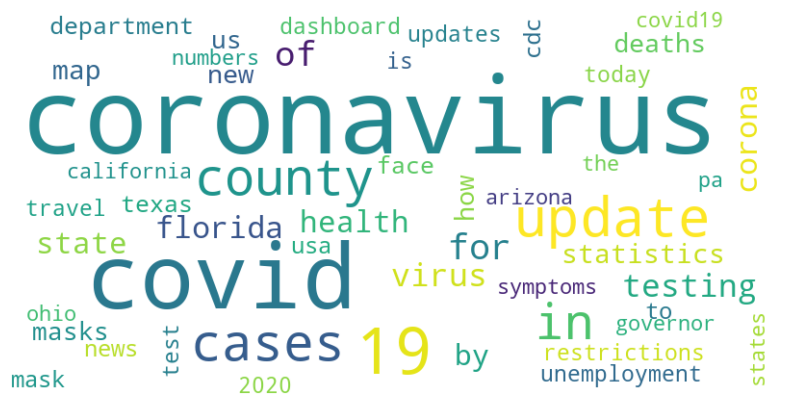

In [110]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_entities)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The top words across the 4 different countries also makes sense as words for China, Italy and Nicaragua include words that are in different languages and local to that specifici country, such as "Wuhan" and "sintomas."

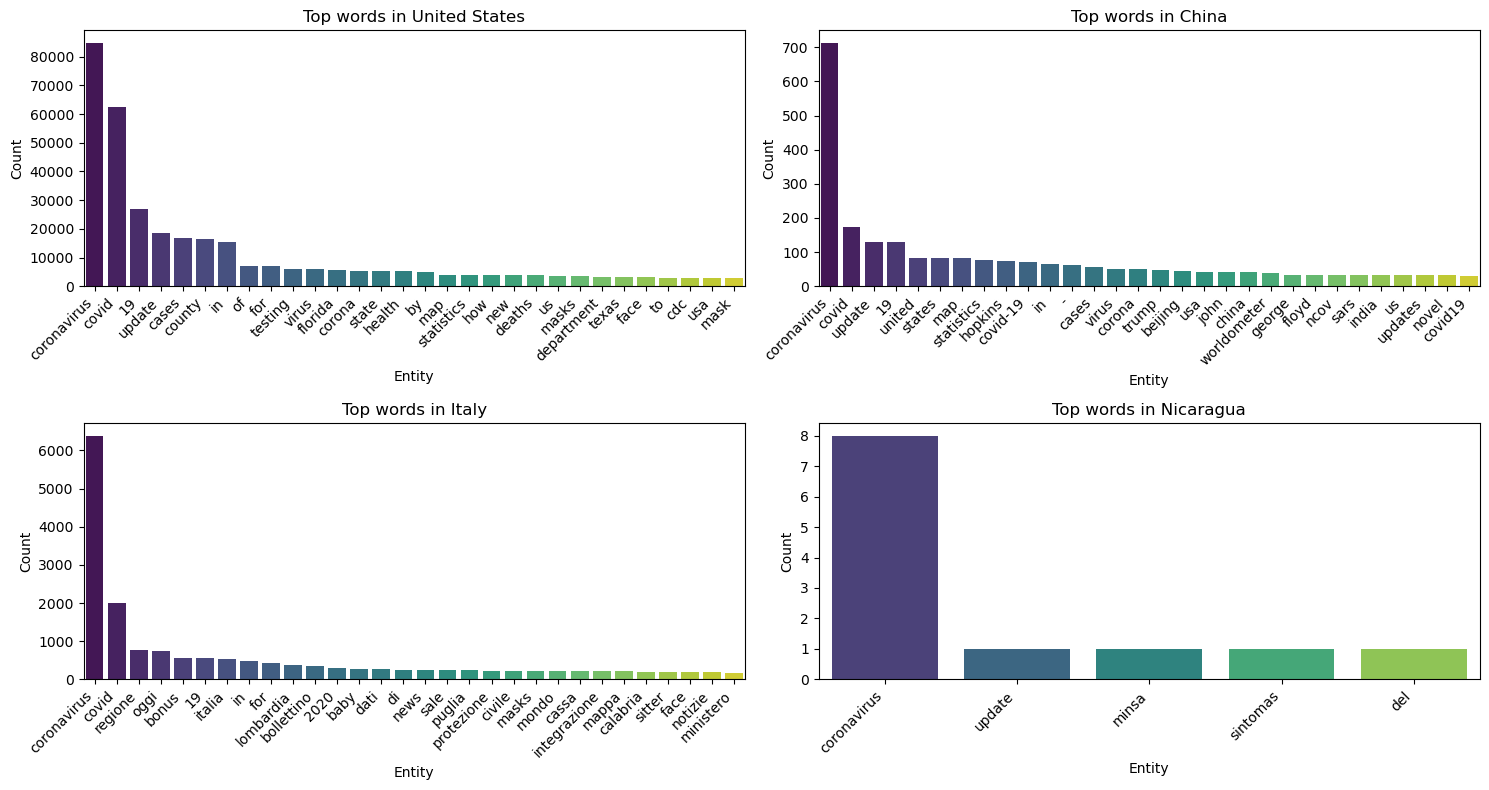

In [119]:
import seaborn as sns
all_tokens = [token for sublist in filtered_df['Tokens'] for token in sublist]
token_counts = Counter(all_tokens)
sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

def get_top_entities(country_df):
    all_tokens = [token for sublist in country_df['Tokens'] for token in sublist]
    token_counts = Counter(all_tokens)
    sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)
    top_entities = sorted_tokens[:30]
    return pd.DataFrame(top_entities, columns=['Entity', 'Count'])

countries = filtered_df['Country'].unique()

plt.figure(figsize=(15, 8))

for i, country in enumerate(countries, 1):
    plt.subplot(2, 2, i)  # Adjust the subplot grid based on the number of unique countries
    subset = filtered_df[filtered_df['Country'] == country]
    top_entities_subset = get_top_entities(subset)
    sns.barplot(x='Entity', y='Count', data=top_entities_subset, palette='viridis')
    plt.title(f'Top words in {country}')
    plt.xlabel('Entity')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

 NLP Application 1: Sentiment Analysis

In [24]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/edwinv/nltk_data...


True

In [56]:
# Load NLTK SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores for a query
def get_sentiment_scores(query):
    return sid.polarity_scores(query)

tqdm.pandas(desc="sentiment scores per query")
filtered_df['SentimentScores'] = filtered_df['Query'].progress_apply(get_sentiment_scores)

# Extract sentiment scores into separate columns
filtered_df[['Negative', 'Neutral', 'Positive', 'Compound']] = pd.DataFrame(filtered_df['SentimentScores'].tolist(), index=filtered_df.index)

sentiment scores per query: 100%|█████| 216236/216236 [00:29<00:00, 7348.66it/s]


In [67]:
filtered_df.head(40)

,Date,Query,IsImplicitIntent,Country,PopularityScore,Tokens,SentimentScores,Negative,Neutral,Positive,Compound
0,2020-06-01,covid antibody test near me,False,United States,1,"[covid, antibody, test, near, me]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
2,2020-06-01,connect myflorida login,True,United States,17,"[connect, myflorida, login]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
3,2020-06-01,covid antibody test,False,United States,1,"[covid, antibody, test]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,2020-06-01,covid antibody,False,United States,1,"[covid, antibody]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
6,2020-06-01,connecticut coronavirus,False,United States,1,"[connecticut, coronavirus]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
10,2020-06-01,connecticut coronavirus cases,False,United States,1,"[connecticut, coronavirus, cases]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
11,2020-06-01,covid antibodies test,False,United States,1,"[covid, antibodies, test]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
13,2020-06-01,connecticut coronavirus update,False,United States,1,"[connecticut, coronavirus, update]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
14,2020-06-01,covid antibodies,False,United States,1,"[covid, antibodies]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
15,2020-06-01,connecticut covid,False,United States,1,"[connecticut, covid]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


Looking at the compound sentiment across countries also tend to trend negative or very low positive scores. This makes sense as the searches included words such as "deaths", "virus" and "symptoms" which can have lower scores. Since many of these searches are scientific and emotionless in nature, the overall sentiment should be close to zero rather than positive. 

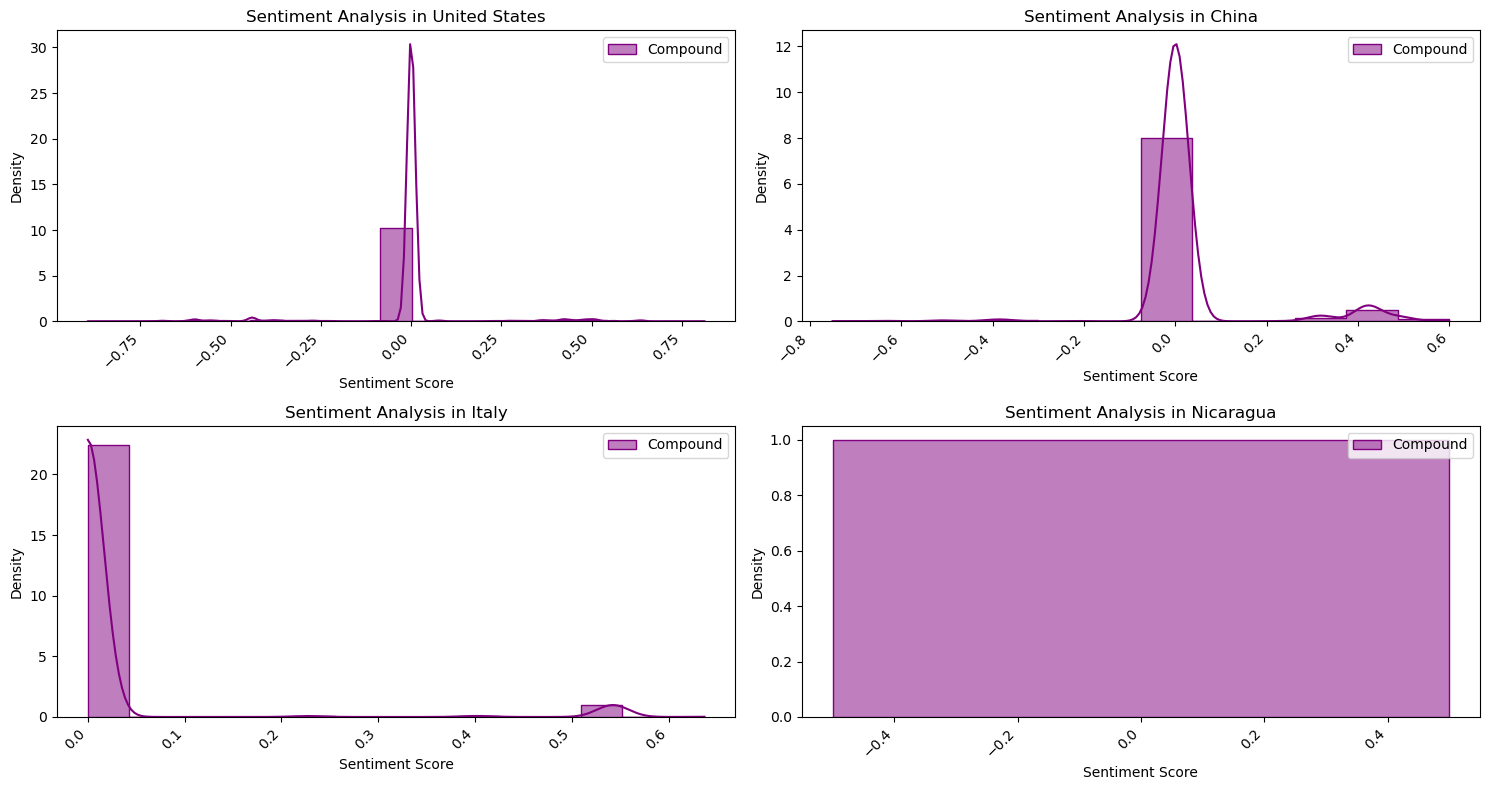

In [66]:
countries = df['Country'].unique()
colors = {'Negative': 'red', 'Neutral': 'blue', 'Positive': 'green', 'Compound': 'purple'}

plt.figure(figsize=(15, 8))

for i, country in enumerate(countries, 1):
    plt.subplot(2, 2, i)  # Adjust the subplot grid based on the number of unique countries
    subset = filtered_df[filtered_df['Country'] == country]
    for sentiment_category in ['Compound']:
        sns.histplot(subset[sentiment_category], label=sentiment_category, kde=True, element="step", stat="density", common_norm=False, color=colors[sentiment_category])
    plt.title(f'Sentiment Analysis in {country}')
    plt.xlabel('Sentiment Score')
    plt.legend()
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

NLP topic 4: Parts of Speech tagging

In [68]:
def get_pos_tags(query):
    doc = nlp(query)
    return [(token.text, token.pos_) for token in doc]

tqdm.pandas(desc="POS tags for each query")
filtered_df['POSTags'] = filtered_df['Query'].progress_apply(get_pos_tags)

POS tags for each query: 100%|██████████| 216236/216236 [39:14<00:00, 91.84it/s]


KeyError: 'POSTags'

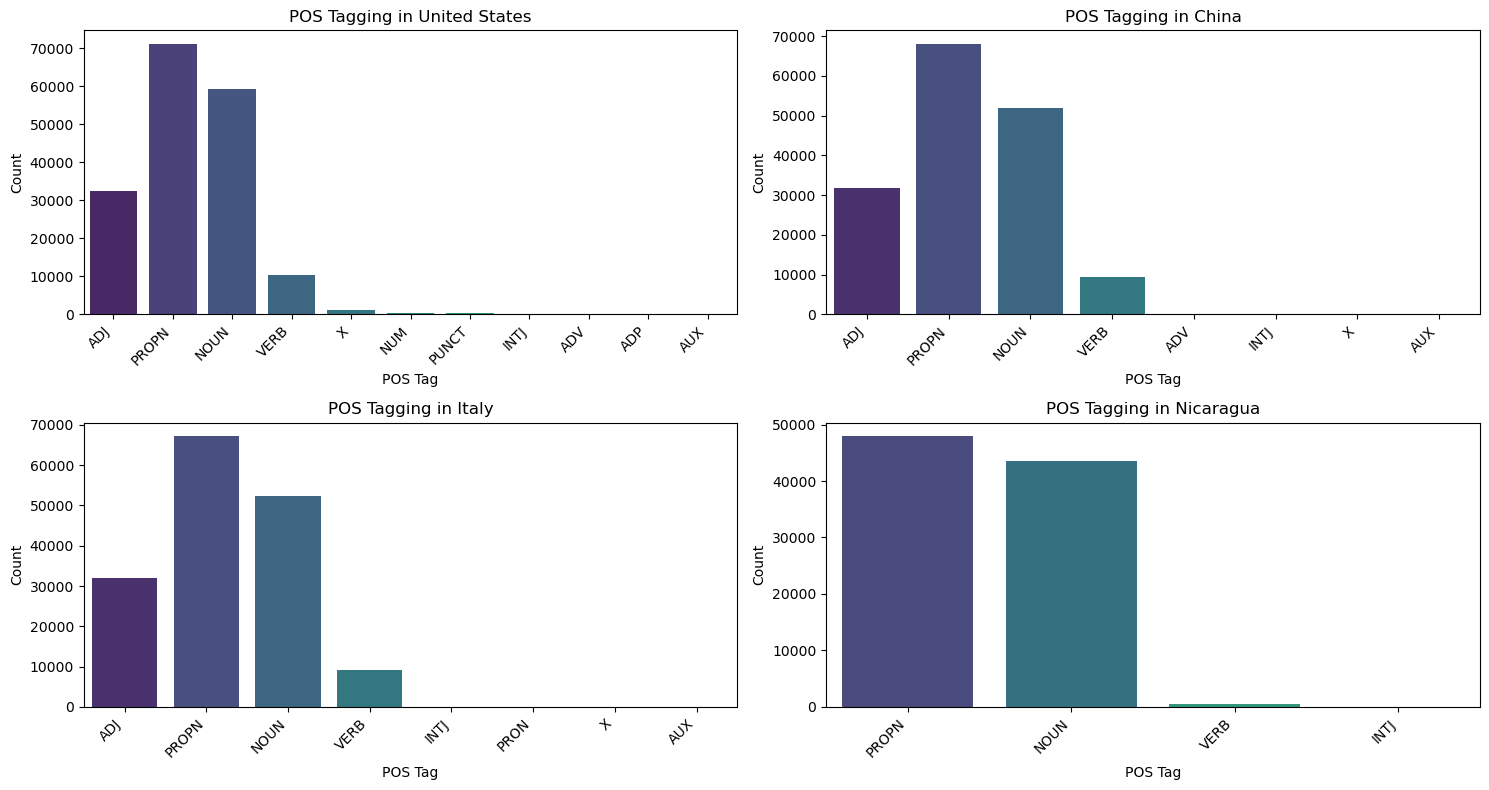

In [69]:

pos_tags_df = pd.DataFrame([(token, pos) for query_pos_tags in filtered_df['POSTags'] for token, pos in query_pos_tags], columns=['Token', 'POS'])

countries = filtered_df['Country'].unique()

plt.figure(figsize=(15, 8))

for i, country in enumerate(countries, 1):
    plt.subplot(2, 2, i)  # Adjust the subplot grid based on the number of unique countries
    subset = filtered_df[filtered_df['Country'] == country]
    sns.countplot(x='POS', data=pos_tags_df[pos_tags_df['Token'].isin(subset['Query'].explode().unique())], palette='viridis')
    plt.title(f'POS Tagging in {country}')
    plt.xlabel('POS Tag')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


NLP topic 5: word2vec

In [84]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize the queries
tokenized_queries = filtered_df['Query'].apply(word_tokenize)

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_queries, vector_size=2, window=5, min_count=1, workers=4)

# Example: Get the vector for a specific word (e.g., 'Coronavirus')
vector = word2vec_model.wv['protest']
print("Word2Vec Vector for 'protest':", vector)

word2vec_model.build_vocab(tokenized_queries)
word2vec_model.train(tokenized_queries, total_examples=word2vec_model.corpus_count, epochs=5)

Word2Vec Vector for 'protest': [-0.24823007  0.25900862]


(2235233, 3558720)

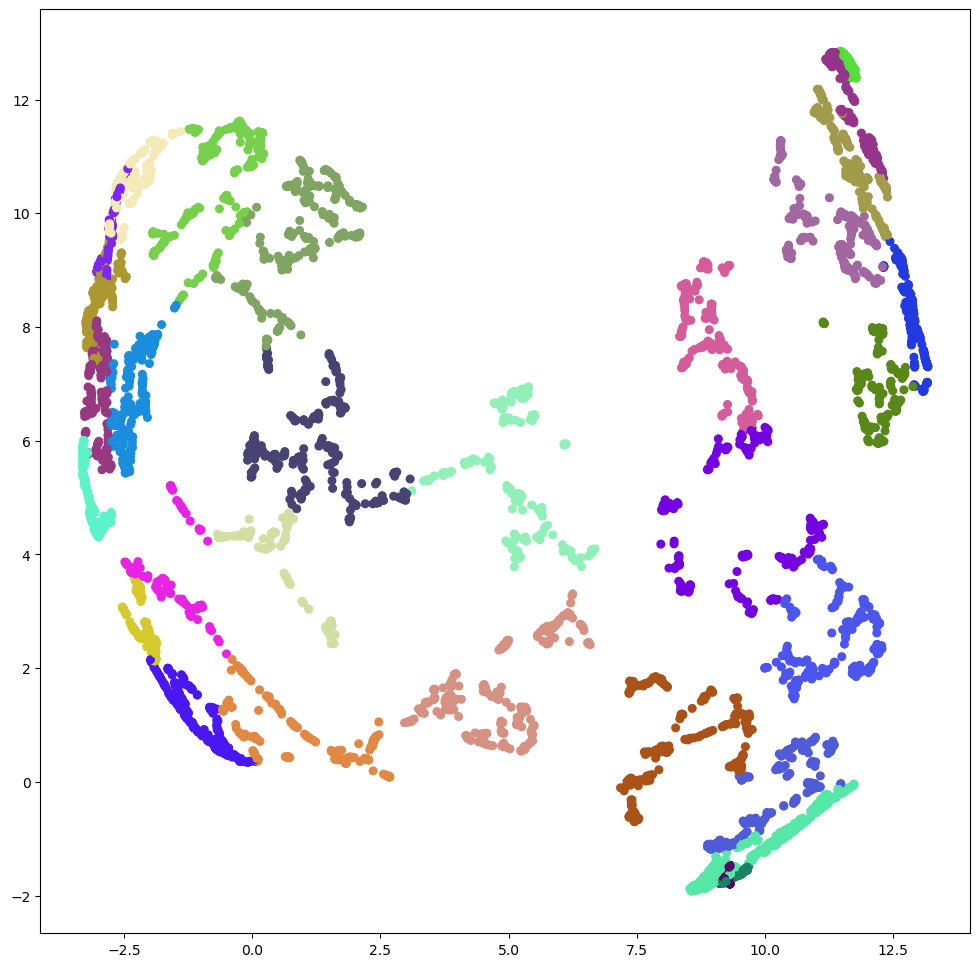

In [90]:
import umap
from sklearn.cluster import KMeans

X = word2vec_model.wv[word2vec_model.wv.key_to_index]

umap_model = umap.UMAP(n_neighbors=10, min_dist=0, n_components=3, random_state=42)
umap_result = umap_model.fit_transform(X)

kmeans = KMeans(n_clusters=30, random_state=42)
kmeans.fit(umap_result)
labels = kmeans.labels_

plt.figure(figsize=(12, 12))

colors = np.random.rand(len(set(labels)), 3)

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=colors[labels], s=30)

plt.show()

NLP Application 2: Transformers and Text Summarization
To better understand what each cluster is about, we can use text summarization.

In [95]:
# !pip install transformers

In [102]:
from transformers import pipeline

summarizer = pipeline("summarization")

cluster_summaries = []
for cluster_label in set(labels):
    print('-------')
    print(cluster_label)
    cluster_data_indices = np.where(labels == cluster_label)[0]
    cluster_text = " ".join(filtered_df.iloc[cluster_data_indices]['Query'])

    summary = summarizer(cluster_text, max_length=50, min_length=5, length_penalty=2.0, num_beams=4, early_stopping=True)
    cluster_summaries.append(summary[0]['summary_text'])

for i, summary in enumerate(cluster_summaries):
    print(f"Cluster {i + 1} Summary: {summary}")

No model was supplied, defaulted to t5-small and revision d769bba (https://huggingface.co/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
Token indices sequence length is longer than the specified maximum sequence length for this model (2261 > 512). Running this sequence through the model will result in indexing errors


-------
0
-------
1
-------
2
-------
3
-------
4
-------
5
-------
6
-------
7
-------
8
-------
9
-------
10
-------
11
-------
12
-------
13
-------
14
-------
15
-------
16
-------
17
-------
18
-------
19
-------
20
-------
21
-------
22
-------
23
-------
24
-------
25
-------
26
-------
27
-------
28
-------
29
Cluster 1 Summary: coronavirus statistics in mexico il resto del carlino reggio emilia worst states for coron . tennessee pledge tauck sylvia browne s
Cluster 2 Summary: coronavirus update nebraska nh coron a virus update az coronanavirus sd covid 19 updates wuhan china world o meters coronivirus statistics in
Cluster 3 Summary: coronavirus iowa governor inslee press conference indiana covid update icd 10 for covid exposure . michigan lockdown cvs michigan . update mich.gov coron
Cluster 4 Summary: coronavirus update nj covid 19 nevada covid . n95 covid 20 masks for kids . covid 19, ky covid, 19 johns hopkins tracker coron
Cluster 5 Summary: covid 19 update coronavirus ca

Cluster 15 is interesting because it appears to be about stimulus checks, border reopenings, and travel.
Cluster 25 appears to be related to new jobs that resulted from the pandemic.

Overall, the summarization is not that good... removal of stopwords and specific words related to this dataset such as "covid" would make the results better.

Let's see if we can understand the dataset using LDA, another way of extracting the general topics in a large corpus of text.

NLP topics 6 and 7: LDA and BOW

In [117]:
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize

# Create a dictionary and corpus
dictionary = corpora.Dictionary(tokenized_queries)
corpus = [dictionary.doc2bow(query) for query in tokenized_queries]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=30, id2word=dictionary, passes=10)

# Display topics
print("LDA Topics:")
for topic in lda_model.print_topics():
    print(topic)


LDA Topics:
(12, '0.287*"restrictions" + 0.239*"travel" + 0.112*"coronavirus" + 0.108*"covid" + 0.070*"alabama" + 0.056*"free" + 0.039*"hawaii" + 0.027*"cornavirus" + 0.006*"costa" + 0.006*"lazio"')
(1, '0.274*"news" + 0.146*"coronavirus" + 0.119*"covid" + 0.101*"rate" + 0.069*"missouri" + 0.063*"la" + 0.033*"italy" + 0.032*"vermont" + 0.019*"chicago" + 0.017*"latest"')
(10, '0.307*"testing" + 0.281*"covid" + 0.111*"test" + 0.051*"coronavirus" + 0.029*"sites" + 0.029*"oklahoma" + 0.027*"tennessee" + 0.025*"antibody" + 0.023*"blood" + 0.022*"signs"')
(3, '0.179*"california" + 0.172*"coronavirus" + 0.089*"colorado" + 0.084*"covid" + 0.078*"trend" + 0.070*"with" + 0.047*"los" + 0.047*"angeles" + 0.039*"alaska" + 0.034*"va"')
(15, '0.387*"florida" + 0.141*"covid" + 0.121*"dashboard" + 0.115*"coronavirus" + 0.044*"utah" + 0.039*"on" + 0.034*"mn" + 0.031*"quarantine" + 0.028*"connecticut" + 0.012*"coronovirus"')
(19, '0.395*"of" + 0.193*"coronavirus" + 0.062*"stimulus" + 0.054*"georgia" + 0.

Topic 13 appears to be discussing the use of masks for coronavirus, particularly in 2020 and for kids and topic 12 seems to focus on travel restrictions related to COVID-19 with specific mentions of Alabama and Hawaii. Overall, provides good overview of the general things people were searching for, but could be improved by removing stopwords.

### Conclusion
This project used several NLP techniques to understand the different things people were searching on the internet related to Covid 19 during June 2020. This project used NLP libraries and pretrained models (NLTK, transformers, and Gensim and Spacy). I applied the following topics to explore this dataset: NER, POS, Word2Vec, Tokenization, LDA and BOW. I implemented the following NLP applications: text summarization and sentiment analysis.

I really enjoyed experimenting with the text summarization capabilities of the HuggingFace transformer library. I was able to get a good overview of search activity during a month in 2020; however, better stopwords that are specific to this dataset, such as "covid" would improve this dataset by removing the words that are implicit given the nature of the data. Also removing sites using regular expressions would help the understandability of the results. Word2Vec overall provided such a great way to segment the search queries at scale but more exploration on the optimal number of clusters is needed.